In [1]:
import os
from os import path
import csv
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
def process_folder(input_path):
    if (not path.exists(input_path)):
        print("Input folder address is incorrect")
        return
    open("data.csv", mode='a').close()
    data = {'File Name':[], 'Extension':[], 'Creation Time':[],
          'Modified Time':[], 'File Directory':[], 'File Drive':[], 'File Size':[]}
    for (dirpath, dirnames, filenames) in os.walk(input_path):
        for filename in filenames:
            name, extension = os.path.splitext(filename)
            fullpath = path.join(dirpath, filename)
            creation_time = os.path.getctime(fullpath)
            modified_time = os.path.getmtime(fullpath)
            directory_name = os.path.basename(os.path.dirname(fullpath))
            drive, tail = os.path.splitdrive(fullpath)
            stats = os.stat(fullpath)
            file_size = stats.st_size
            data['File Name'].append(name)
            data['Extension'].append(extension)
            data['Creation Time'].append(time.ctime(creation_time))
            data['Modified Time'].append(time.ctime(modified_time))
            data['File Directory'].append(directory_name)
            data['File Drive'].append(drive)
            data['File Size'].append(file_size)
    df = pd.DataFrame(data = data)
    f = open('data.csv', "w+").close()
    df.to_csv('data.csv', index=False)

In [4]:
process_folder('D:\\masm32')

In [3]:
df = pd.read_csv('data.csv')
display(df)

,File Name,Extension,Creation Time,Modified Time,File Directory,File Drive,File Size
0,bigtstbd,.qsc,Fri May 20 19:58:41 2022,Thu Sep 15 05:15:04 2005,masm32,D:,10424
1,bin2dbex,.exe,Fri May 20 19:58:42 2022,Mon Oct 25 07:27:40 2010,masm32,D:,52336
2,blankdlg,.qsc,Fri May 20 19:58:41 2022,Sun Jan 4 10:58:32 2004,masm32,D:,4139
3,bldmakit,.qsc,Fri May 20 19:58:41 2022,Fri Oct 14 16:28:08 2011,masm32,D:,1208
4,blockp,.ini,Fri May 20 19:58:41 2022,Tue Sep 20 11:24:34 2011,masm32,D:,15
...,...,...,...,...,...,...,...
2503,dbghelp,.asm,Fri May 20 19:58:40 2022,Sun May 26 18:27:20 2002,dbghel~1,D:,6484
2504,dbghelp,.def,Fri May 20 19:58:40 2022,Sat May 25 11:21:14 2002,dbghel~1,D:,1539
2505,dbghelp,.inc,Fri May 20 19:58:41 2022,Sat May 25 11:17:26 2002,dbghel~1,D:,3866
2506,dbghelp,.lib,Fri May 20 19:58:41 2022,Sun Oct 2 08:19:06 2011,dbghel~1,D:,54698


In [5]:
creation_time_df = df.groupby(['Creation Time'])['File Size'].sum().reset_index()
display(creation_time_df)

,Creation Time,File Size
0,Fri May 20 19:58:40 2022,5337287
1,Fri May 20 19:58:41 2022,21810946
2,Fri May 20 19:58:42 2022,6335687
3,Fri May 20 19:58:48 2022,2178
4,Fri May 20 19:58:49 2022,25416
...,...,...
120,Fri May 20 20:01:12 2022,316224
121,Fri May 20 20:01:15 2022,20376
122,Fri May 20 20:01:24 2022,30688
123,Fri May 20 20:01:35 2022,2560


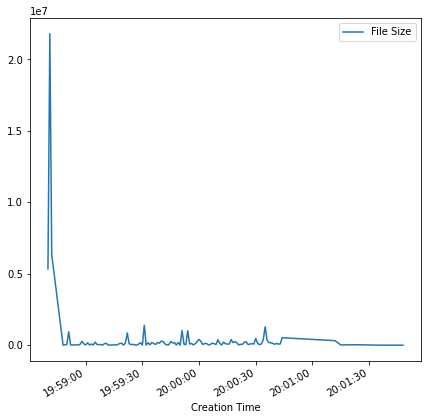

In [7]:
creation_time_df['Creation Time'] = pd.to_datetime(creation_time_df['Creation Time'])
creation_time_df.set_index('Creation Time').plot(figsize=(7, 7)) 
plt.show()

125


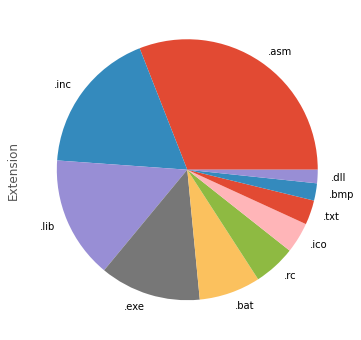

In [8]:
print(df['Creation Time'].nunique())
with plt.style.context('ggplot'):
    df['Extension'].value_counts().head(10).plot.pie(y='Extension', figsize=(6, 6))

In [9]:
modified_time_df = df.groupby(['Modified Time'])['File Size'].sum().reset_index()
display(modified_time_df)

,Modified Time,File Size
0,Fri Apr 22 14:53:32 2005,1013
1,Fri Apr 30 05:49:40 1999,2463
2,Fri Aug 1 16:31:20 2008,5681
3,Fri Aug 1 17:18:20 2008,371
4,Fri Aug 1 19:38:28 2008,8079
...,...,...
1685,Wed Sep 14 07:45:40 2005,1226
1686,Wed Sep 15 06:16:42 2004,1480
1687,Wed Sep 15 07:07:52 1999,755
1688,Wed Sep 15 07:21:34 2004,1239


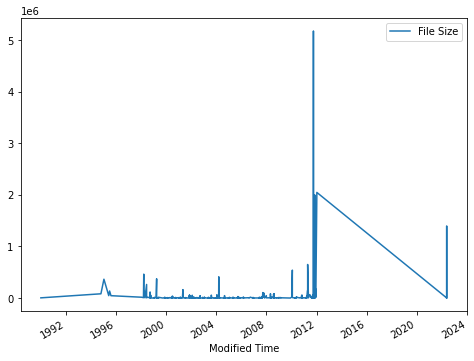

In [12]:
modified_time_df['Modified Time'] = pd.to_datetime(modified_time_df['Modified Time'])
modified_time_df.set_index('Modified Time').plot(figsize=(8, 6)) 
plt.show()

In [13]:
file_size_column = df['File Size']
max_file_size = file_size_column.max()
print(max_file_size)

5169076


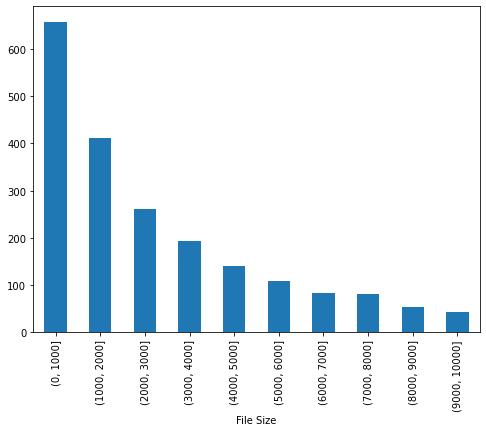

In [14]:
file_size_df = df.groupby(pd.cut(df['File Size'], np.arange(0, max_file_size+1000, 1000)))['File Size'].count()
file_size_df.head(10).plot.bar(x='File Size', figsize=(8,6))
plt.show()

,Modified Time,Count
0,Friday,489
1,Monday,376
2,Saturday,272
3,Sunday,391
4,Thursday,223
5,Tuesday,260
6,Wednesday,497


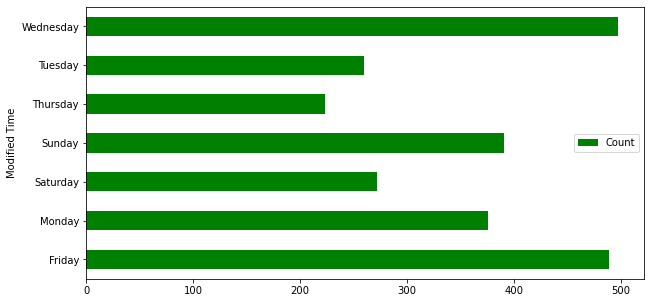

In [18]:
week_day_update_df = df.copy()
week_day_update_df['Modified Time'] = pd.to_datetime(week_day_update_df['Modified Time']).dt.day_name()
week_day_update_df = week_day_update_df.groupby(['Modified Time'])['File Size'].count().reset_index()
week_day_update_df = week_day_update_df.rename(columns={'File Size':'Count'})
display(week_day_update_df)
week_day_update_df.set_index('Modified Time').plot.barh(color='green', figsize=(10, 5)) 
plt.show()

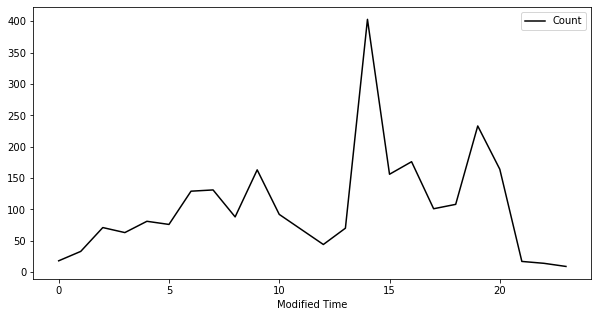

In [20]:
hour_update_df = df.copy()
hour_update_df['Modified Time'] = pd.to_datetime(hour_update_df['Modified Time']).dt.hour
hour_update_df = hour_update_df.groupby(['Modified Time'])['File Size'].count().reset_index()
hour_update_df = hour_update_df.rename(columns={'File Size':'Count'})
hour_update_df.set_index('Modified Time').plot(style='k-', figsize=(10, 5))
plt.show()

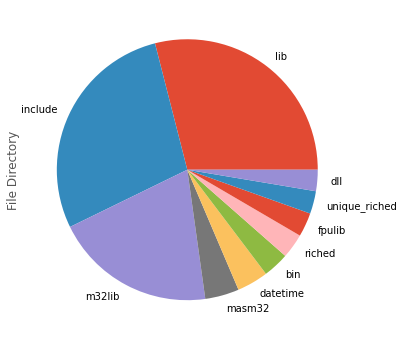

In [22]:
with plt.style.context('ggplot'):
    df['File Directory'].value_counts().head(10).plot.pie(y='File Directory', figsize=(6, 6))